## Arthur Intelligence | Computer Vision Challenge
https://www.notion.so/Arthur-Computer-Vision-Challenge-1321cb6cbe9843ff91c6f7e2d4575bc9

#### Team 1: PyTry
* Matteo Esposito, Sashank Subba, Sonam Tamang

In [1]:
import os
os.getcwd()

'/Users/Matteo/Github/concordai-hackathon'

### 1A - Using OpenCV and HaarCascades

In [12]:
import cv2
import numpy as np 

In [3]:
# Front of face classifier
faceCascade = cv2.CascadeClassifier('./data/cascades/haarcascade_frontalface_alt2.xml')

In [4]:
IMG_PATH = './images/'

# Convert .jpg to a numpy array
img_reg = cv2.imread(IMG_PATH + 'grp-pic.jpg') # Reg
img_gray = cv2.cvtColor(img_reg, cv2.COLOR_BGR2GRAY) # Grayscale

In [5]:
# Set up cascades
# Detect faces in the image
faces = faceCascade.detectMultiScale(
    img_reg,
    scaleFactor=1.2,
    minNeighbors=5
)

In [6]:
# Draw a rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(img_reg, (x, y), (x+w, y+h), (0, 255, 0), 2)

In [11]:
# Output picture with identified faces
cv2.imshow("Picture output", img_reg)

while True:    
    if cv2.waitKey(20) & 0xFF == ord('q'):
        break;

### 1B - Using OpenCV and HaarCascades (Video feed)

In [13]:
# Front of face classifier (functions on grayscale)
face_cascade = cv2.CascadeClassifier('./data/cascades/haarcascade_frontalface_alt2.xml')

# Create capture device object (default webcam)
cap = cv2.VideoCapture(0)

# Resolution adjusters
def make_480p():
    cap.set(3,640) # width
    cap.set(4,480) # height

make_480p()

# Loop for continuous usage of video capture device
# Read frames from capture and display them
while True:
    ret, frame = cap.read() 

    # Convert frame to grayscale and initialize model
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor = 1.5, minNeighbors = 5)
    
    # Iterate through face position and save image
    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w] # Region of interest (y-start:y-end, x-start:x-end )
        
        # Predict label id (classification) and confidence level
        id_, conf = recognizer.predict(roi_gray)

        # Draw a rectangle over the region of interest
        color = (255, 0, 0) # BGR not RGB
        stroke = 2
        end_coord_x = x + w
        end_coord_y = y + h 
        cv2.rectangle(frame, (x,y), (end_coord_x, end_coord_y), color, stroke)

    # Main feed window
    cv2.imshow('Video Feed', frame)

    # To prevent video feed hanging (Added functionality where hit 'q' to end feed)
    if cv2.waitKey(20) & 0xFF == ord('q'):
        break;

# Closing capture object and recording
cap.release()
cv2.destroyAllWindows()

NameError: name 'recognizer' is not defined

### FaceNet Implementation

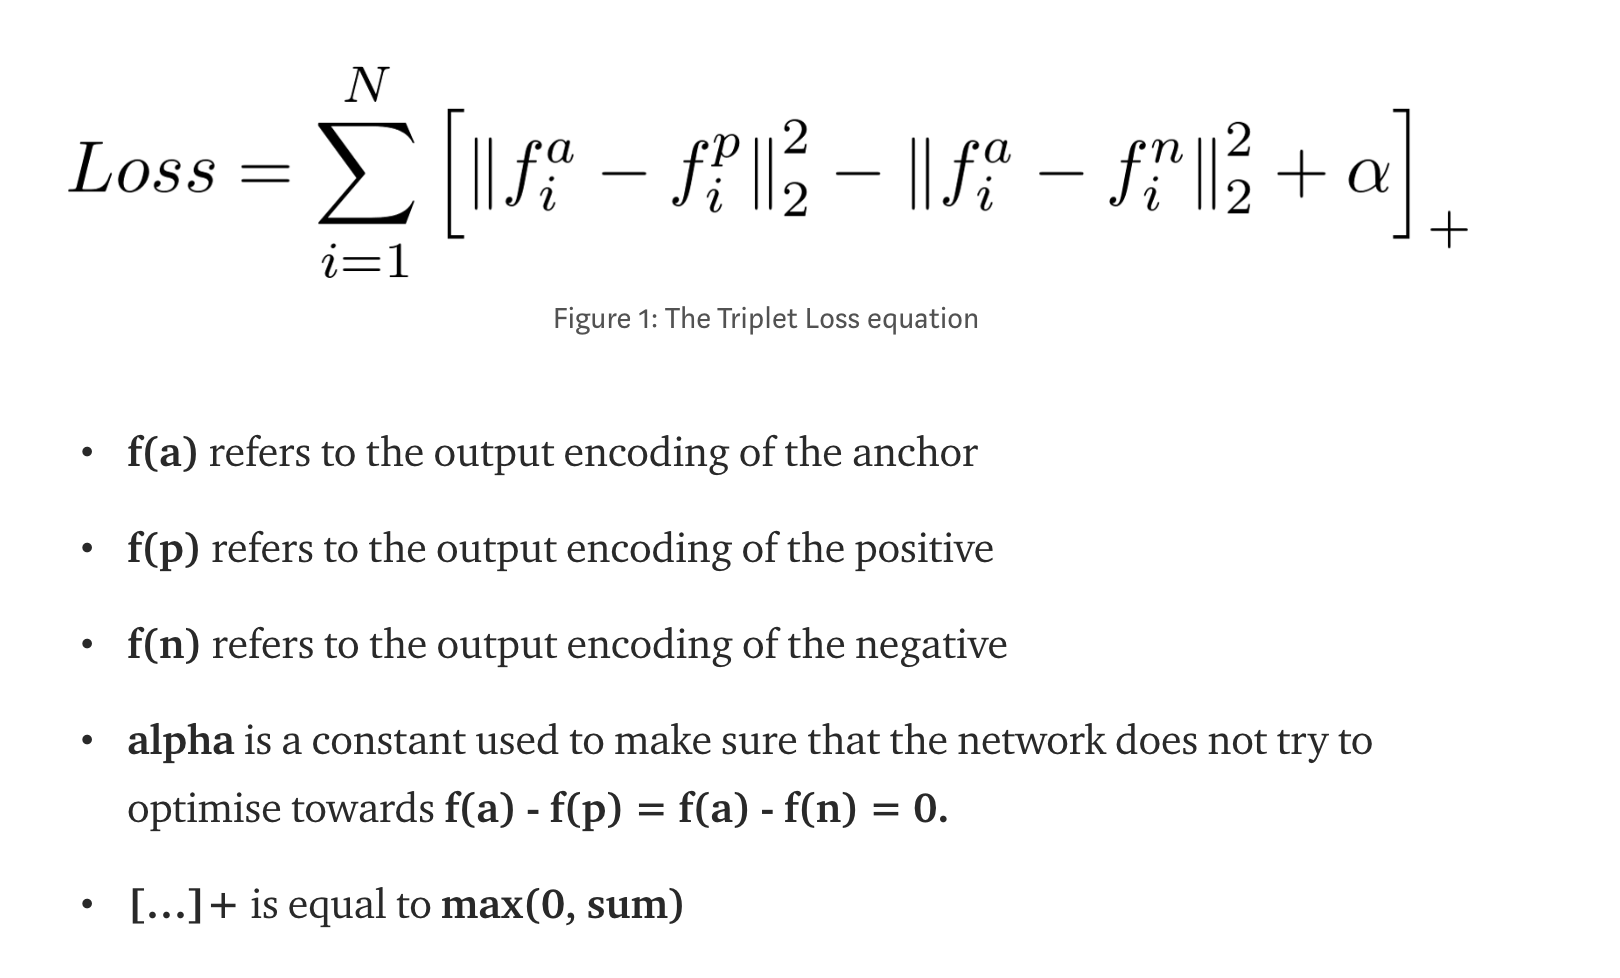

In [25]:
from IPython.display import Image
Image(IMG_PATH + 'loss-function.png', width=650, height=650) 

In [23]:
import os
import glob
import numpy as np
import cv2
import tensorflow as tf

from fr_utils import *
from inception_blocks_v2 import *
from keras import backend as K

In [ ]:
K.set_image_data_format('channels_first')
FRmodel = faceRecoModel(input_shape=(3, 96, 96))
def triplet_loss(y_true, y_pred, alpha = 0.3):
    anchor, positive, negative = y_pred[0], y_pred[1], y_pred[2]

    pos_dist = tf.reduce_sum(tf.square(tf.subtract(anchor,
               positive)), axis=-1)
    neg_dist = tf.reduce_sum(tf.square(tf.subtract(anchor, 
               negative)), axis=-1)
    basic_loss = tf.add(tf.subtract(pos_dist, neg_dist), alpha)
    loss = tf.reduce_sum(tf.maximum(basic_loss, 0.0))
   
    return loss
FRmodel.compile(optimizer = 'adam', loss = triplet_loss, metrics = ['accuracy'])
load_weights_from_FaceNet(FRmodel)